# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.
This was a project I took from course 100 Days of Code:The Complete Python Pro Bootcamp for 2022 

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [439]:
import pandas as pd

# Notebook Presentation

In [440]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [441]:
df_apps = pd.read_csv('apps.csv')

In [442]:
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social,"July 28, 2017",4.1 and up
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education,"April 15, 2016",3.0 and up
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",4.2 and up
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [443]:
df_apps.shape

(10841, 12)

In [444]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

In [445]:
df_apps.sample(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
3990,Sleep as Android Garmin Addon,HEALTH_AND_FITNESS,2.60,114,1.60,"10,000",Free,0,Everyone,Health & Fitness,"June 20, 2018",2.3 and up
1505,CP Channel,FAMILY,4.60,7,12.00,500,Free,0,Everyone 10+,Education,"March 21, 2018",4.1 and up
492,EU RCD Guide,BOOKS_AND_REFERENCE,NaN,0,45.00,10,Paid,$3.61,Everyone,Books & Reference,"June 29, 2016",4.0 and up
9796,HD Camera Ultra,PHOTOGRAPHY,4.30,462152,1.50,"10,000,000",Free,0,Everyone,Photography,"October 17, 2015",Varies with device
1086,Top Novini BG,NEWS_AND_MAGAZINES,NaN,2,2.90,100,Free,0,Everyone,News & Magazines,"June 14, 2016",4.1 and up
1648,BGKontakti London BG Kontakti,SOCIAL,NaN,4,8.90,500,Free,0,Everyone,Social,"March 23, 2017",3.0 and up
1138,Dulquer Salmaan HD Wallpapers,PERSONALIZATION,NaN,1,3.90,100,Free,0,Everyone,Personalization,"May 22, 2018",4.0 and up
1428,Theme Android P Black design for LG V30,PERSONALIZATION,4.40,8,6.20,100,Paid,$1.49,Everyone,Personalization,"April 6, 2018",7.0 and up
7755,"Apartment List: Housing, Apt, and Property Ren...",HOUSE_AND_HOME,4.50,8481,7.50,"1,000,000",Free,0,Everyone,House & Home,"August 3, 2018",5.0 and up
7630,Zombie Hunter King,GAME,4.30,10354,50.00,"1,000,000",Free,0,Mature 17+,Action,"August 1, 2018",2.3 and up


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [446]:
df_apps.drop(columns=['Last_Updated','Android_Ver'], inplace=True)

In [447]:
df_apps

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business
...,...,...,...,...,...,...,...,...,...,...
10836,Subway Surfers,GAME,4.50,27723193,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10837,Subway Surfers,GAME,4.50,27724094,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10838,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10839,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade


### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [448]:
df_apps.isna().values.sum()

1475

In [449]:
df_apps_clean = df_apps.dropna()

In [450]:
df_apps_clean.shape

(9367, 10)

In [451]:
nan_rows = df_apps[df_apps.Rating.isna()]
nan_rows.head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business
5,Test Application DT 02,ART_AND_DESIGN,NaN,0,1.20,0,Free,0,Everyone,Art & Design
6,Pekalongan CJ,SOCIAL,NaN,0,5.90,0,Free,0,Teen,Social
7,EG | Explore Folegandros,TRAVEL_AND_LOCAL,NaN,0,56.00,0,Paid,$3.99,Everyone,Travel & Local
8,cronometra-br,PRODUCTIVITY,NaN,0,5.40,0,Paid,$154.99,Everyone,Productivity
9,Eu sou Rico,FINANCE,NaN,0,2.60,0,Paid,$30.99,Everyone,Finance


### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [452]:
duplicated_rows = df_apps_clean[df_apps_clean.duplicated()]
duplicated_rows.head(15)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.70,6,4.90,100,Free,0,Mature 17+,Dating
1379,CT Scan Cross Sectional Anatomy,MEDICAL,4.30,10,46.00,100,Free,0,Everyone,Medical
1616,JH Blood Pressure Monitor,MEDICAL,3.70,9,2.90,500,Free,0,Everyone,Medical
1642,Cardi B Live Stream Video Chat - Prank,DATING,4.40,28,3.40,500,Free,0,Everyone,Dating
1813,Diabetes & Diet Tracker,MEDICAL,4.60,395,19.00,"1,000",Paid,$9.99,Everyone,Medical
1821,Transenger – Ts Dating and Chat for Free,DATING,3.60,8,14.00,"1,000",Free,0,Mature 17+,Dating


In [453]:
duplicated_rows.shape

(476, 10)

In [454]:
duplicated_rows[duplicated_rows.App=='Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


If we do this without specifying how to identify duplicates, we see that 3 copies of Instagram are retained because they have a different number of reviews. We need to provide the column names that should be used in the comparison to identify duplicates.

In [455]:
df_apps_clean[df_apps_clean.App=='Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [456]:
df_apps_clean= df_apps_clean1.drop_duplicates(subset=["App", 'Type', 'Price'])

In [457]:
df_apps_clean1[df_apps_clean.App=='Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


In [458]:
df_apps_clean.shape

(8199, 10)

# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app? Only apps with very few reviews (and a low number on installs) have perfect 5 star ratings (most likely by friends and family).

In [459]:
df_apps_clean.sort_values(by=["Rating"], ascending=False)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography
...,...,...,...,...,...,...,...,...,...,...
1314,CR Magazine,BUSINESS,1.00,1,7.80,100,Free,0,Everyone,Business
1932,FE Mechanical Engineering Prep,FAMILY,1.00,2,21.00,"1,000",Free,0,Everyone,Education
357,Speech Therapy: F,FAMILY,1.00,1,16.00,10,Paid,$2.99,Everyone,Education
818,Familial Hypercholesterolaemia Handbook,MEDICAL,1.00,2,33.00,100,Free,0,Everyone,Medical


Only apps with very few reviews (and a low number on installs) have perfect 5 star ratings (most likely by friends and family).

# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? Here we can clearly see that there seems to be an upper bound of 100 MB for the size of an app. A quick google search would also have revealed that this limit is imposed by the Google Play Store itself. It’s interesting to see that a number of apps actually hit that limit exactly.

In [460]:
df_apps_clean.sort_values(by=["Size_MBs"], ascending=False)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness
...,...,...,...,...,...,...,...,...,...,...
2648,Ad Remove Plugin for App2SD,PRODUCTIVITY,4.10,66,0.02,"1,000",Paid,$1.29,Everyone,Productivity
5798,ExDialer PRO Key,COMMUNICATION,4.50,5474,0.02,"100,000",Paid,$3.99,Everyone,Communication
2684,My baby firework (Remove ad),FAMILY,4.10,30,0.01,"1,000",Paid,$0.99,Everyone,Entertainment
7966,Market Update Helper,LIBRARIES_AND_DEMO,4.10,20145,0.01,"1,000,000",Free,0,Everyone,Libraries & Demo


Here we can clearly see that there seems to be an upper bound of 100 MB for the size of an app. A quick google search would also have revealed that this limit is imposed by the Google Play Store itself. It’s interesting to see that a number of apps actually hit that limit exactly.

# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?If you look at the number of reviews, you can find the most popular apps on the Android App Store. These include the usual suspects: Facebook, WhatsApp, Instagram etc. What’s also notable is that the list of the top 50 most reviewed apps does not include a single paid app! 🤔

In [461]:
df_apps_clean.sort_values(by=["Reviews"], ascending=False).head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.50,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.60,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


If you look at the number of reviews, you can find the most popular apps on the Android App Store. These include the usual suspects: Facebook, WhatsApp, Instagram etc. What’s also notable is that the list of the top 50 most reviewed apps does not include a single paid app! 🤔

# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [462]:
ratings = df_apps_clean.Content_Rating.value_counts()
ratings

Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

If you were to release an app, would you choose to go after a competitive category with many other apps? Or would you target a popular category with a high number of downloads?

In [463]:
import plotly.express as px

All Android apps have a content rating like “Everyone” or “Teen” or “Mature 17+”. Let’s take a look at the distribution of the content ratings in our dataset and see how to visualise it with plotly - a popular data visualisation library that you can use alongside or instead of Matplotlib.

In [464]:
fig = px.pie(labels=ratings.index, values=ratings.values, names=ratings.index, title="Content Rating")
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [465]:
df_instalss = df_apps_clean[df_apps_clean["Installs"]=="1,000,000,000"]
df_instalss.shape

(20, 10)

In [466]:
df_instalss = df_apps_clean[df_apps_clean["Installs"]=="1"]
df_instalss.shape

(3, 10)

In [467]:
df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(',',"")

In [468]:
df_apps_clean["Installs"] = pd.to_numeric(df_apps_clean["Installs"])

In [469]:
df_numeric["Installs"] = df_numeric["Installs"].astype(int)

In [470]:
df_group_by = df_apps_clean

In [471]:
df_group_by[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [472]:
df_apps_clean.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical


In [473]:
df_apps_clean.Price = df_apps_clean.Price.astype(str).str.replace('$',"")

C:\Users\Leon\AppData\Local\Temp\ipykernel_40624\94466593.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [474]:
df_apps_clean["Price"] = pd.to_numeric(df_apps_clean["Price"])

### The most expensive apps sub $250

 Finding the most Expensive Apps and Filtering out the Junk

In [475]:
df_apps_clean.sort_values(by=["Price"], ascending=False).head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,1000,Paid,399.99,Teen,Finance
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,5000,Paid,399.99,Everyone,Entertainment
3221,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.30,180,3.80,5000,Paid,399.99,Everyone,Finance


What’s going on here? There are 15 I am Rich Apps in the Google Play Store apparently. They all cost $300 or more, which is the main point of the app. The story goes that in 2008, Armin Heinrich released the very first I am Rich app in the iOS App Store for $999.90. The app does absolutely nothing. It just displays the picture of a gemstone and can be used to prove to your friends how rich you are. Armin actually made a total of 7 sales before the app was hastily removed by Apple. Nonetheless, it inspired a bunch of copycats on the Android App Store, but if you search today, you’ll find all of these apps have disappeared as well. The high installation numbers are likely gamed by making the app was available for free at some point to get reviews and appear more legitimate.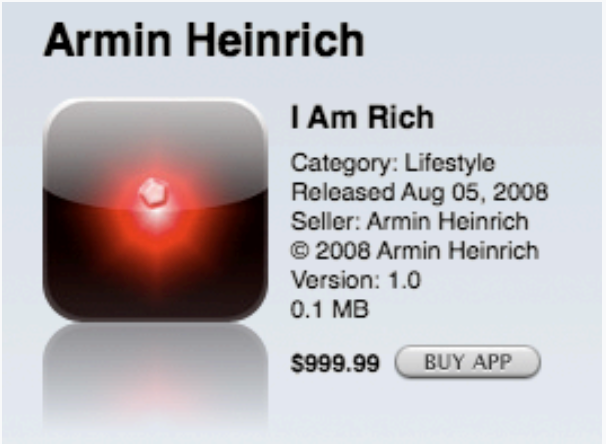

Leaving this bad data in our dataset will misrepresent our analysis of the most expensive 'real' apps. Here’s how we can remove these rows.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest-grossing paid apps according to this estimate? Out of the top 10, how many are games?

In [476]:
df_apps_clean["Revenue_Estimate"] = df_apps_clean["Installs"]*df_apps_clean["Price"]

In [477]:
df_apps_clean.sort_values(by=["Revenue_Estimate"], ascending=False).head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle,"39,999,000.00"
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance,"19,999,500.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle,"4,000,000.00"
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle,"3,999,900.00"


In [478]:
df_apps_clean = df_apps_clean[df_apps_clean['Price']<250]

In [518]:
df_apps_clean.sort_values(by=["Revenue_Estimate"], ascending=False).head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,1000000,Paid,2.99,Everyone,Strategy,"2,990,000.00"
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,1000000,Paid,2.99,Teen,Action,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"


The top spot of the highest-grossing paid app goes to … Minecraft at close to $70 million. It’s quite interesting that Minecraft (along with Bloons and Card Wars) is actually listed in the Family category rather than in the Game category. If we include these titles, we see that 7 out the top 10 highest-grossing apps are games. The Google Play Store seems to be quite flexible with its category labels.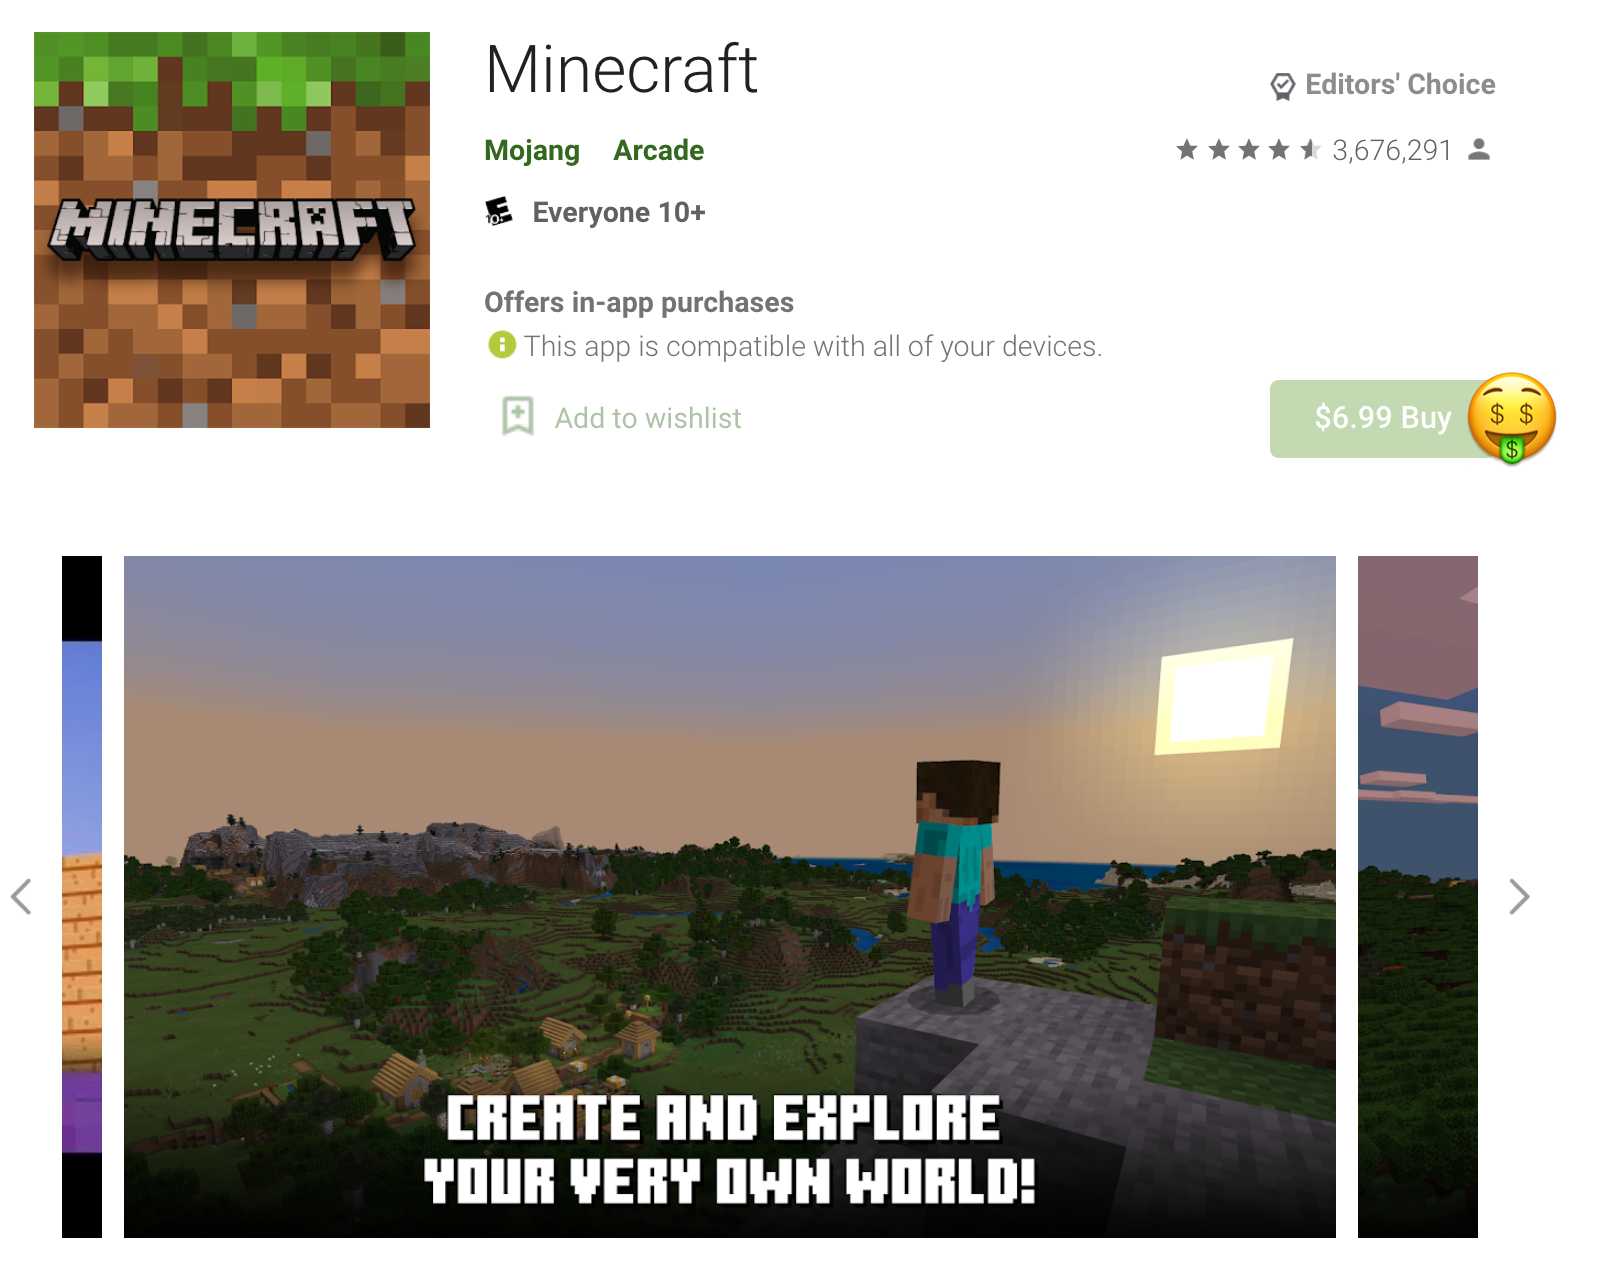

# Plotly Bar Charts & Scatter Plots: Analysing App Categories

If you were to release an app, would you choose to go after a competitive category with many other apps? Or would you target a popular category with a high number of downloads? Or perhaps you can target a category which is both popular but also one where the downloads are spread out among many different apps. That way, even if it’s more difficult to discover among all the other apps, your app has a better chance of getting installed, right? Let’s analyse this with bar charts and scatter plots and figure out which categories are dominating the market.

In [480]:
top10_category = df_apps_clean.Category.value_counts()[:10]
top10_category

FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

In [481]:
top10_category.values

array([1606,  910,  719,  301,  298,  297,  296,  292,  263,  262],
      dtype=int64)

In [482]:
df_apps_clean.Category.nunique()

33

### Vertical Bar Chart - Highest Competition (Number of Apps)

In [483]:
bar = px.bar(x = top10_category.index,
             y = top10_category.values)
bar.show()

Based on the number of apps, the Family and Game categories are the most competitive. Releasing yet another app into these categories will make it hard to get noticed.

But what if we look at it from a different perspective? What matters is not just the total number of apps in the category but how often apps are downloaded in that category. This will give us an idea of how popular a category is

In [484]:
df_by_category =  df_apps_clean.groupby('Category').sum()

In [485]:
df_by_category.sort_values('Installs', ascending=False)[:10]

,Rating,Reviews,Size_MBs,Installs,Price,Revenue_Estimate
Category,,,,,,
GAME,"3,864.40",621892782,"38,486.62",13858762717,277.37,"40,687,840.88"
COMMUNICATION,"1,059.20",285828436,"2,494.69",11039241530,56.69,"4,247,100.00"
TOOLS,"2,904.70",229396472,"5,510.83",8099724500,207.90,"5,462,910.30"
PRODUCTIVITY,"1,259.20",55590376,"3,001.57",5788070180,70.92,"4,304,451.90"
SOCIAL,862.20,227927470,"2,949.99",5487841475,1.98,"5,940.00"
PHOTOGRAPHY,"1,093.20",105506733,"3,630.02",4649143130,72.31,"8,546,049.80"
FAMILY,"6,713.30",143841106,"45,657.63",4437554490,671.86,"103,734,057.70"
VIDEO_PLAYERS,598.40,67366026,"1,959.41",3916897200,10.46,"335,290.00"
TRAVEL_AND_LOCAL,761.00,26819594,"4,044.92",2894859300,37.49,"1,149,250.00"


In [486]:
category_installs = df_apps_clean.groupby('Category').agg({'Installs': "sum"})

In [487]:
category_installs.sort_values('Installs', ascending=True, inplace=True)

In [488]:
category_installs.head(10)

,Installs
Category,
EVENTS,15949410
BEAUTY,26916200
PARENTING,31116110
MEDICAL,39162676
COMICS,44931100
LIBRARIES_AND_DEMO,52083000
AUTO_AND_VEHICLES,53129800
HOUSE_AND_HOME,97082000
ART_AND_DESIGN,114233100


### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [489]:
h_bar = px.bar (x = category_installs.Installs,
                 y = category_installs.index,
                orientation='h',
                title='Category Popularity')
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

Now we see that Games and Tools are actually the most popular categories. If we plot the popularity of a category next to the number of apps in that category we can get an idea of how concentrated a category is. Do few apps have most of the downloads or are the downloads spread out over many apps?

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [490]:
df_by_category2 =  df_apps_clean.groupby('Category').agg({'Installs': "sum",
                                                          'App': 'count'})

In [491]:
df_by_category2.shape

(33, 2)

In [492]:
import plotly.express as px

In [493]:
fig = px.scatter(df_by_category2,x='App',y='Installs',title='Category Concentration',size='App',hover_name=df_by_category2.index,
                    color='Installs' )
fig.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))
fig.show()

What we see is that the categories like Family, Tools, and Game have many different apps sharing a high number of downloads. But for the categories like video players and entertainment, all the downloads are concentrated in very few apps

<img src="k1.png">

Let’s turn our attention to the Genres column. This is quite similar to the categories column but more granular.

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [494]:
df_apps_clean.Genres.value_counts()

Tools                          718
Entertainment                  467
Education                      429
Productivity                   301
Personalization                298
                              ... 
Communication;Creativity         1
Art & Design;Pretend Play        1
Arcade;Pretend Play              1
Music & Audio;Music & Video      1
Casual;Music & Video             1
Name: Genres, Length: 114, dtype: int64

In [495]:
df_apps_clean.Genres.nunique()

114

In [496]:
stack = df_apps_clean.Genres.str.split(';', expand=True).stack()

In [497]:
stack.value_counts()

Tools                      719
Education                  587
Entertainment              498
Action                     304
Productivity               301
Personalization            298
Lifestyle                  298
Finance                    296
Medical                    292
Sports                     270
Photography                263
Business                   262
Communication              258
Health & Fitness           245
Casual                     216
News & Magazines           204
Social                     203
Simulation                 200
Travel & Local             187
Arcade                     185
Shopping                   180
Books & Reference          171
Video Players & Editors    150
Dating                     134
Puzzle                     124
Maps & Navigation          118
Role Playing               111
Racing                     103
Action & Adventure          96
Strategy                    95
Food & Drink                94
Educational                 93
Adventur

In [498]:
print(f'We now have a single column with shape: {stack.shape}')

We now have a single column with shape: (8564,)


In [499]:
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')

Number of genres: 53


In [500]:
num_genres

Tools                      719
Education                  587
Entertainment              498
Action                     304
Productivity               301
Personalization            298
Lifestyle                  298
Finance                    296
Medical                    292
Sports                     270
Photography                263
Business                   262
Communication              258
Health & Fitness           245
Casual                     216
News & Magazines           204
Social                     203
Simulation                 200
Travel & Local             187
Arcade                     185
Shopping                   180
Books & Reference          171
Video Players & Editors    150
Dating                     134
Puzzle                     124
Maps & Navigation          118
Role Playing               111
Racing                     103
Action & Adventure          96
Strategy                    95
Food & Drink                94
Educational                 93
Adventur

# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

In [501]:
import plotly.express as px
bar = px.bar(x=num_genres.index[:15], y=num_genres.values[:15], title='Top Genres', hover_name=num_genres.index[:15],
             color=num_genres.values[:15], color_continuous_scale='Agsunset')
bar.update_layout(xaxis_title='Genre',
yaxis_title='Number of Apps',
coloraxis_showscale=False)
 
bar.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [502]:
df_apps_clean.Type.value_counts()

Free    7595
Paid     589
Name: Type, dtype: int64

In [503]:
df_apps_clean.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0.00,Everyone,Medical,0.00
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,1.49,Everyone,Arcade,1.49
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,0.99,Everyone,Arcade,0.99
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0.00,Everyone,Arcade,0.00
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0.00,Everyone,Medical,0.00


In [504]:
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})

In [505]:
df_free_vs_paid.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

In [506]:
import plotly.graph_objects as go 

In [507]:
df_free_vs_paid.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


In [508]:
free_apps = df_free_vs_paid[df_free_vs_paid.Type=='Free']
paid_apps = df_free_vs_paid[df_free_vs_paid.Type=='Paid']

In [509]:
g_bar = px.bar(df_free_vs_paid,
               x='Category',
               y='App',
               title='Free vs Paid Apps by Category',
               color='Type',
               barmode='group')
 
g_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
g_bar.show()

What we see is that while there are very few paid apps on the Google Play Store, some categories have relatively more paid apps than others, including Personalization, Medical and Weather. So, depending on the category you are targeting, it might make sense to release a paid-for app.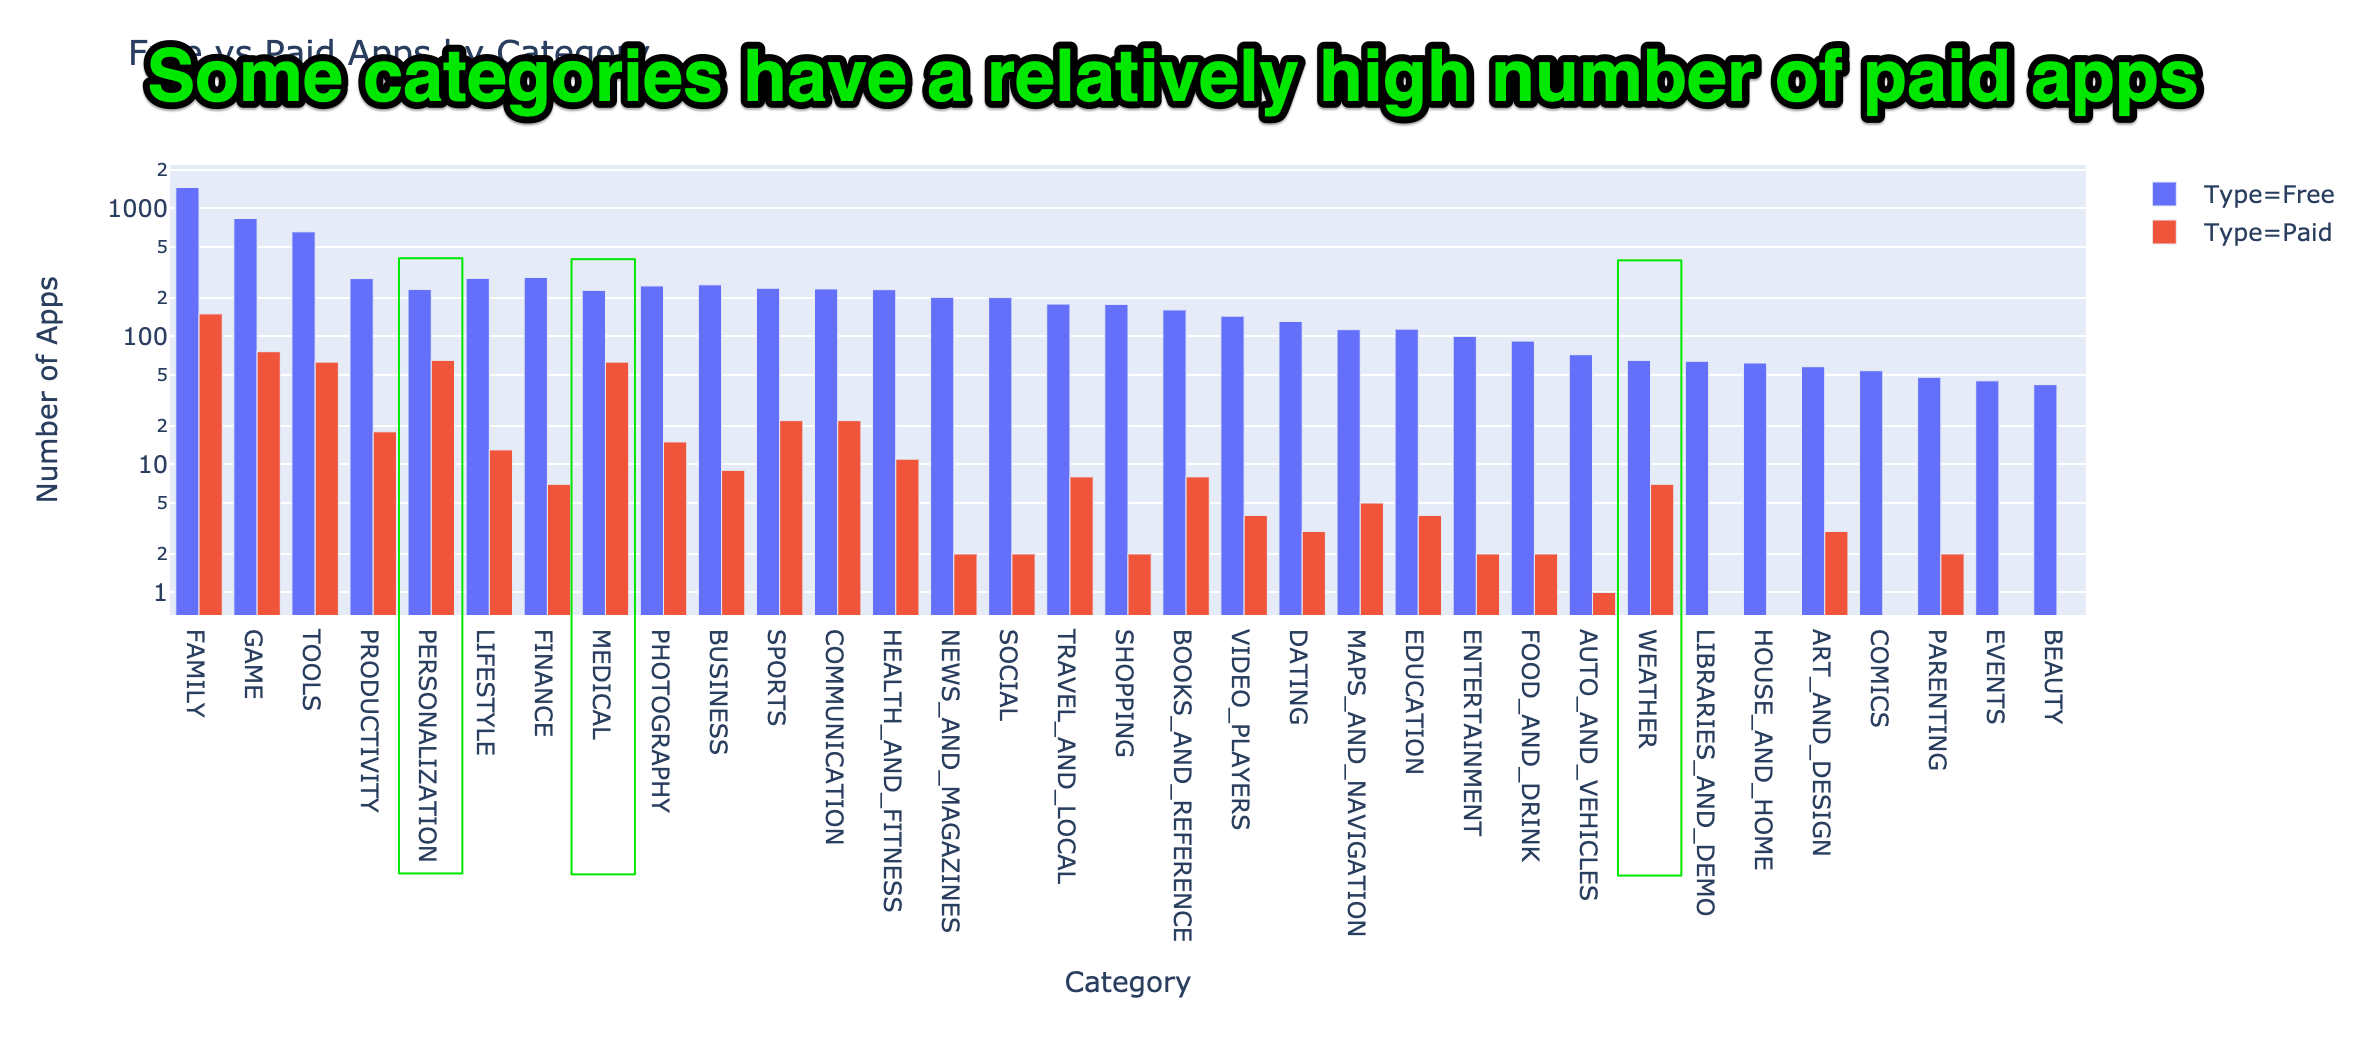

In [510]:
categories = df_free_vs_paid.Category
fig = go.Figure()
fig.add_trace(go.Bar(x =df_free_vs_paid.Category, y = paid_apps.App, name = "Type=Paid" , marker_color='rgb(26,118,225)'))
fig.add_trace(go.Bar(x =df_free_vs_paid.Category, y = free_apps.App, name = "Type=Free" , marker_color='rgb(26,118,225)'))

fig.update_layout(
                    title="Free vs Paid Apps by Category",
                    xaxis_tickfont_size=14, 
                    legend =dict( x=0, y=1.0, bgcolor='rgba(255,255,255,0)', bordercolor = 'rgba(255,255,255,0)'),
                    
          )
fig.show()

In [511]:
free_apps = df_free_vs_paid[df_free_vs_paid.Type=='Free']
paid_apps = df_free_vs_paid[df_free_vs_paid.Type=='Paid']
paid_apps.App.sum()

589

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


In [512]:
 df_free_vs_paid.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


In [513]:
import plotly.express as px
fig = px.box(df_apps_clean, x="Type", y="Installs", color='Type',notched=True, points='all',
             title='How Many Downloads are Paid Apps Giving Up?')
fig.update_layout(yaxis=dict(type='log'))
fig.show()

From the hover text in the chart, we see that the median number of downloads for free apps is 500,000, while the median number of downloads for paid apps is around 5,000! This is massively lower.

But does this mean we should give up on selling a paid app? Let’s see how much revenue we would estimate per category.

# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

In [514]:
box = px.box(df_paid_apps,
             x='Category',
             y="Price",
             title='Price per Category')
 
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))
 
box.show()

If an Android app costs $30,000 to develop, then the average app in very few categories would cover that development cost. The median paid photography app earned about $20,000. Many more app’s revenues were even lower - meaning they would need other sources of revenue like advertising or in-app purchases to make up for their development costs. However, certain app categories seem to contain a large number of outliers that have much higher (estimated) revenue - for example in Medical, Personalisation, Tools, Game, and Family.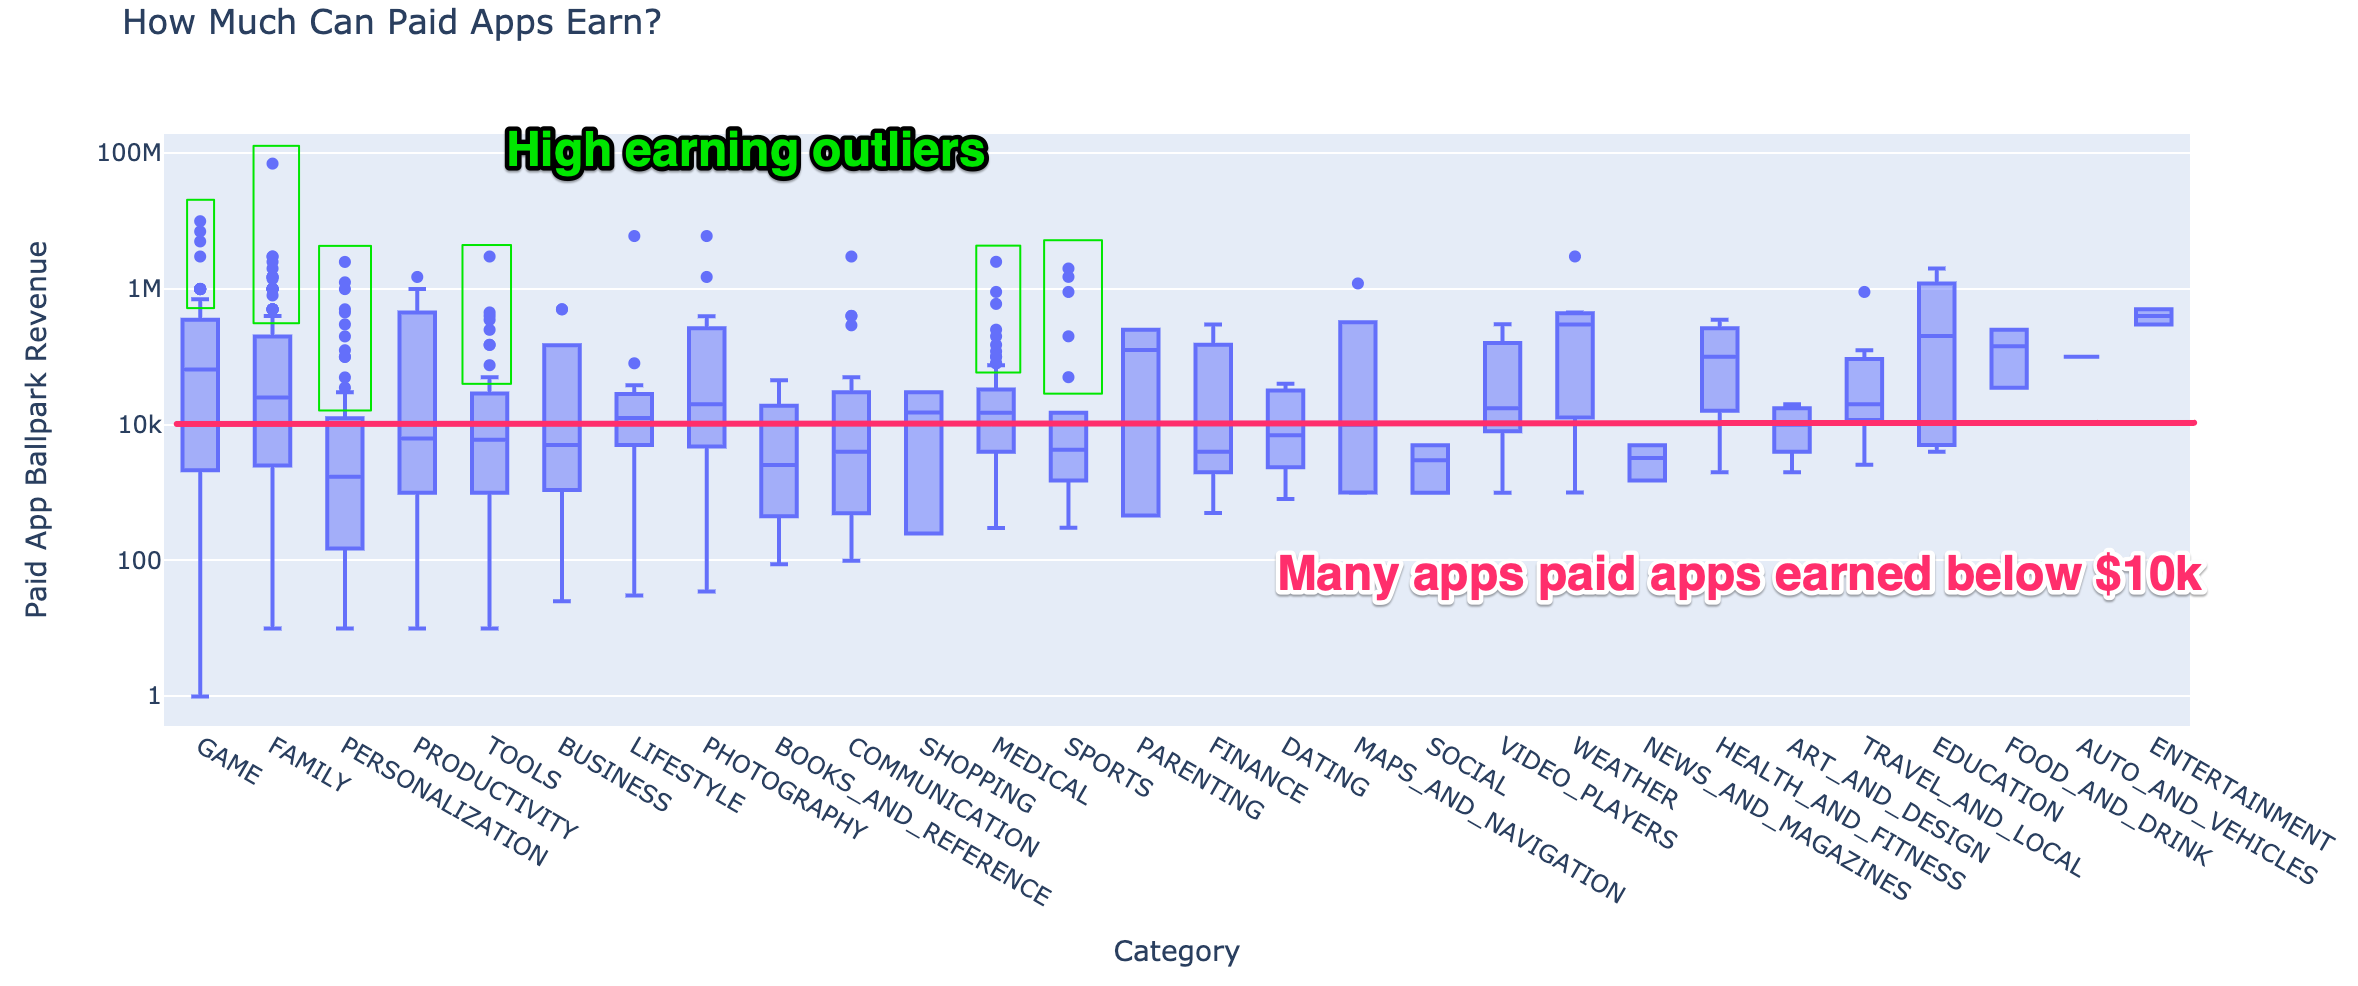

If an Android app costs $30,000 to develop, then the average app in very few categories would cover that development cost. The median paid photography app earned about $20,000. Many more app’s revenues were even lower - meaning they would need other sources of revenue like advertising or in-app purchases to make up for their development costs. However, certain app categories seem to contain a large number of outliers that have much higher (estimated) revenue - for example in Medical, Personalisation, Tools, Game, and Family.

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

The median price for an Android app is $2.99.

In [515]:
df_paid_apps.Price.median()

2.99

However, some categories have higher median prices than others. This time we see that Medical apps have the most expensive apps as well as a median price of $5.49. In contrast, Personalisation apps are quite cheap on average at $1.49. Other categories which higher median prices are Business ($4.99) and Dating ($6.99). It seems like customers who shop in these categories are not so concerned about paying a bit extra for their apps.

In [519]:
box = px.box(df_paid_apps,
             x='Category',
             y="Price",
             title='Price per Category')
 
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))
 
box.show()

However, some categories have higher median prices than others. This time we see that Medical apps have the most expensive apps as well as a median price of $5.49. In contrast, Personalisation apps are quite cheap on average at $1.49. Other categories which higher median prices are Business ($4.99) and Dating ($6.99). It seems like customers who shop in these categories are not so concerned about paying a bit extra for their apps.
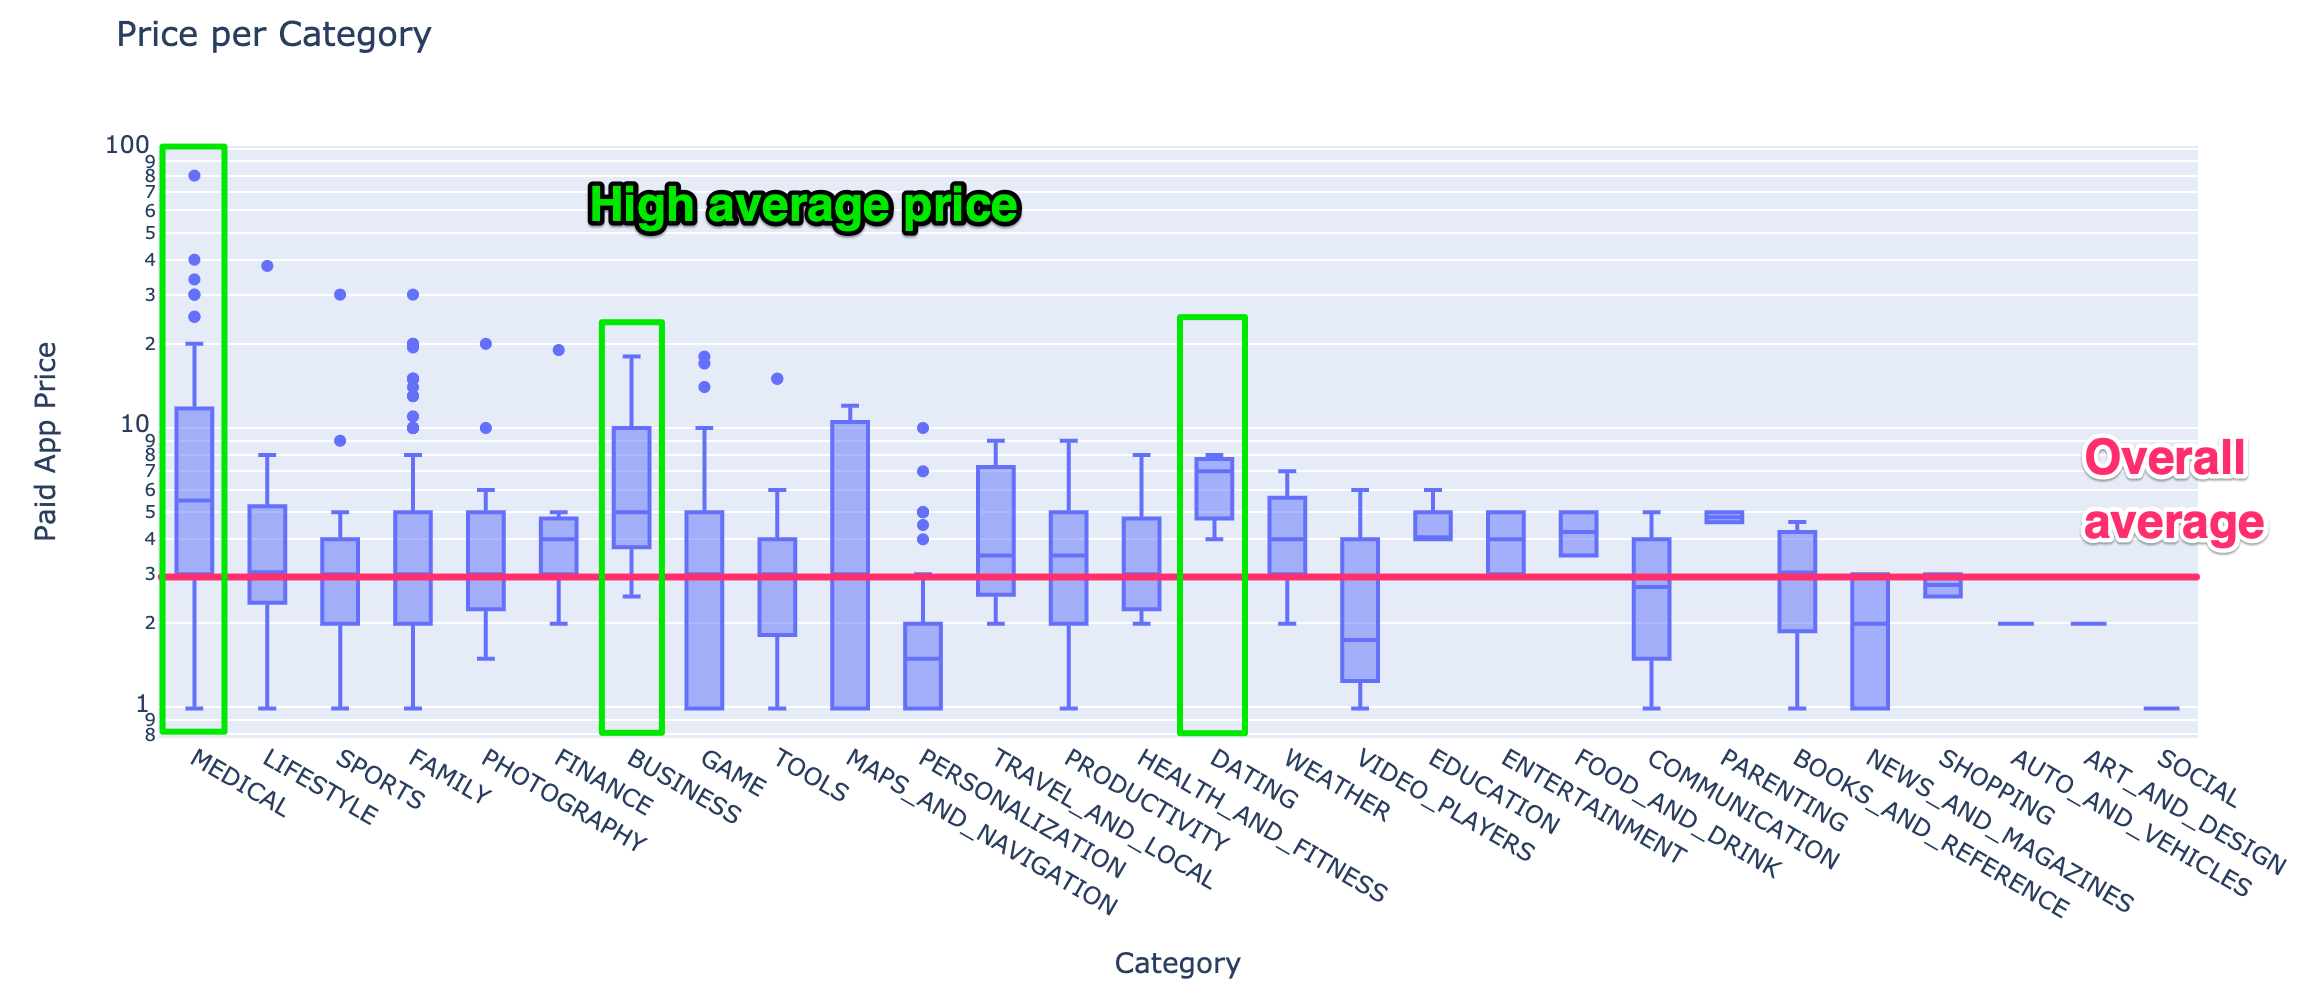